In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from pathlib import Path
import sys

sys.path.append('/mnt/c/Users/devmo/Desktop/SciRes/mess-plus-project/mess-plus')

from classifier.file_reader import read_files_from_folder
from evaluations.utils.wandb_loader import download_log_data, load_all_histories_to_dataframe
from plots.utils.plotting import write_figure_to_disk

NOTEBOOK_PATH = Path("experiments.ipynb").absolute().parent

DATA_DIR = f"{NOTEBOOK_PATH}/data/online"

BENCHMARK_NAMES = ["arc_challenge", "arc_easy", "boolq", "lambada_standard", "logiqa", "logiqa2", "piqa", "sciq", "social_iqa", "winogrande"]
# BENCHMARK_NAMES = ["winogrande"]

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})



In [2]:
run_summary_df = download_log_data(
    entity="tum-i13",
    project_name="mess-plus-api-pricing",
    save_dir=DATA_DIR,
    batch_size=50
)

2025-07-29 11:14:58,014 - evaluations.utils.wandb_loader - INFO - Loaded checkpoint: 2046 runs already processed
2025-07-29 11:14:59,858 - evaluations.utils.wandb_loader - INFO - Found 2044 total runs in project


2025-07-29 11:15:21,341 - evaluations.utils.wandb_loader - INFO - Processing batch of 1 runs (starting at index 0)
2025-07-29 11:15:22,307 - evaluations.utils.wandb_loader - INFO - Download complete! Downloaded 2046 runs
2025-07-29 11:15:22,308 - evaluations.utils.wandb_loader - INFO - All data saved to /mnt/c/Users/devmo/Desktop/SciRes/mess-plus-project/mess-plus/evaluations/data/online


In [3]:
display(run_summary_df)
run_df = load_all_histories_to_dataframe(DATA_DIR)

for name in BENCHMARK_NAMES:
	run_df.loc[run_df["run_name"].str.contains(name), "benchmark_name"] = name
	run_df.loc[run_df["run_name"].str.contains(name), "run_name"] = run_df.loc[run_df["run_name"].str.contains(name), "run_name"].str.replace(f"{name}_", "")

pat = r'V=([^_]+)_a=([^_]+)_c=([^_]+)_seed=([^_]+)'
run_df[['V', 'alpha', 'c', 'seed']] = run_df['run_name'].str.extract(pat)
run_df[['V', 'alpha', 'c']] = run_df[['V', 'alpha', 'c']].astype(float)
run_df['seed'] = run_df['seed'].astype(int)
run_df["alpha"] = run_df["alpha"].astype(float)
run_df["V"] = run_df["V"].astype(float)
run_df["c"] = run_df["c"].astype(float)
run_df["seed"] = run_df["seed"].astype(int)

run_df["models/small_chosen"] = run_df["models/small_chosen"].astype(float)
run_df["models/medium_chosen"] = run_df["models/medium_chosen"].astype(float)
run_df["models/large_chosen"] = run_df["models/large_chosen"].astype(float)

display(run_df.head())

,id,name,path,url,created_at,tags,summary,config
0,sdpceri2,arc_challenge_V=0.1_a=0.4_c=1.0_seed=42_togeth...,"[tum-i13, mess-plus-api-pricing, sdpceri2]",https://wandb.ai/tum-i13/mess-plus-api-pricing...,2025-06-04T15:32:09Z,[],"{'V': 0.1, 'alpha': 0.4, 'avg_accuracy': 0.433...","{'seed': 43, 'lm_eval': {'benchmarks': ['arc_c..."
1,nd28d4mz,boolq_V=0.1_a=0.7_c=1.0_seed=42_together.ai,"[tum-i13, mess-plus-api-pricing, nd28d4mz]",https://wandb.ai/tum-i13/mess-plus-api-pricing...,2025-06-04T15:32:11Z,[],"{'V': 0.1, 'alpha': 0.7, 'avg_accuracy': 0.723...","{'seed': 43, 'lm_eval': {'benchmarks': ['boolq..."
2,esc9qwqc,arc_easy_V=0.1_a=0.65_c=1.0_seed=42_together.ai,"[tum-i13, mess-plus-api-pricing, esc9qwqc]",https://wandb.ai/tum-i13/mess-plus-api-pricing...,2025-06-04T15:32:12Z,[],"{'V': 0.1, 'alpha': 0.65, 'avg_accuracy': 0.66...","{'seed': 43, 'lm_eval': {'benchmarks': ['arc_e..."
3,x8xkfgsp,logiqa_V=0.1_a=0.3_c=1.0_seed=42_together.ai,"[tum-i13, mess-plus-api-pricing, x8xkfgsp]",https://wandb.ai/tum-i13/mess-plus-api-pricing...,2025-06-04T15:32:13Z,[],"{'V': 0.1, 'alpha': 0.3, 'avg_accuracy': 0.320...","{'seed': 43, 'lm_eval': {'benchmarks': ['logiq..."
4,tlcbkfq4,lambada_standard_V=0.1_a=0.3_c=1.0_seed=42_tog...,"[tum-i13, mess-plus-api-pricing, tlcbkfq4]",https://wandb.ai/tum-i13/mess-plus-api-pricing...,2025-06-04T15:32:14Z,[],"{'V': 0.1, 'alpha': 0.3, 'avg_accuracy': 0.529...","{'seed': 43, 'lm_eval': {'benchmarks': ['lamba..."
...,...,...,...,...,...,...,...,...
2041,hpx1ijrz,boolq_V=0.001_a=0.85_c=0.01_seed=44_together.ai,"[tum-i13, mess-plus-api-pricing, hpx1ijrz]",https://wandb.ai/tum-i13/mess-plus-api-pricing...,2025-07-27T13:01:54Z,[],"{'V': 0.001, 'alpha': 0.85, 'avg_accuracy': 0....","{'seed': 43, 'lm_eval': {'benchmarks': ['boolq..."
2042,y13bxzx6,boolq_V=0.0001_a=0.85_c=0.01_seed=44_together.ai,"[tum-i13, mess-plus-api-pricing, y13bxzx6]",https://wandb.ai/tum-i13/mess-plus-api-pricing...,2025-07-27T13:03:03Z,[],"{'V': 0.0001, 'alpha': 0.85, 'avg_accuracy': 0...","{'seed': 43, 'lm_eval': {'benchmarks': ['boolq..."
2043,9s2ys8ot,boolq_V=1e-05_a=0.85_c=0.01_seed=44_together.ai,"[tum-i13, mess-plus-api-pricing, 9s2ys8ot]",https://wandb.ai/tum-i13/mess-plus-api-pricing...,2025-07-27T13:04:11Z,[],"{'V': 1e-05, 'alpha': 0.85, 'avg_accuracy': 0....","{'seed': 43, 'lm_eval': {'benchmarks': ['boolq..."
2044,fmlucwgz,boolq_V=1e-06_a=0.85_c=0.01_seed=44_together.ai,"[tum-i13, mess-plus-api-pricing, fmlucwgz]",https://wandb.ai/tum-i13/mess-plus-api-pricing...,2025-07-27T13:05:20Z,[],"{'V': 1e-06, 'alpha': 0.85, 'avg_accuracy': 0....","{'seed': 43, 'lm_eval': {'benchmarks': ['boolq..."


2025-07-29 11:15:37,789 - evaluations.utils.wandb_loader - INFO - Found 2047 run directories


Loading run histories:   0%|          | 0/2047 [00:00<?, ?it/s]

2025-07-29 11:15:37,833 - evaluations.utils.wandb_loader - INFO - No valid history found for run .ipynb_checkpoints, skipping
2025-07-29 11:17:05,418 - evaluations.utils.wandb_loader - INFO - No valid history found for run dvnoy273, skipping
2025-07-29 11:19:39,812 - evaluations.utils.wandb_loader - INFO - Combined DataFrame shape: (4987707, 28)
2025-07-29 11:19:39,813 - evaluations.utils.wandb_loader - INFO - Total rows: 4987707
2025-07-29 11:19:40,000 - evaluations.utils.wandb_loader - INFO - Unique runs: 2045
2025-07-29 11:19:40,001 - evaluations.utils.wandb_loader - INFO - Metrics available: ['mess_plus/q_length', 'mess_plus/x_t', 'step_time', '_timestamp', 'running_avg_cost_usd', 'mess_plus/step_cost_usd', 'mess_plus/exploration_step_ratio', '_step', 'avg_accuracy', 'mess_plus/chosen_model', 'models/large_chosen', '_runtime', 'models/small_chosen', 'mess_plus/p_t', 'step_cost_usd', 'total_runtime', 'models/medium_chosen', 'classifier/train_loss', 'created_at', 'running_total_cost_

,mess_plus/q_length,mess_plus/x_t,step_time,_timestamp,running_avg_cost_usd,mess_plus/step_cost_usd,mess_plus/exploration_step_ratio,_step,avg_accuracy,mess_plus/chosen_model,...,config_run_name,config_algorithm,config_model_zoo,config_classifier_model,running_total_cost_usd,benchmark_name,V,alpha,c,seed
0,0.00,1,8.407761,1.749056e+09,0.000033,0.000033,1.0,0,1.000000,2,...,baseline,NaN,NaN,NaN,NaN,sciq,0.000001,0.97,1.0,43
1,0.97,1,8.365044,1.749056e+09,0.000035,0.000038,1.0,1,0.500000,2,...,baseline,NaN,NaN,NaN,NaN,sciq,0.000001,0.97,1.0,43
2,0.94,1,8.158141,1.749056e+09,0.000036,0.000037,1.0,2,0.666667,2,...,baseline,NaN,NaN,NaN,NaN,sciq,0.000001,0.97,1.0,43
3,0.91,1,8.316464,1.749056e+09,0.000037,0.000040,1.0,3,0.750000,2,...,baseline,NaN,NaN,NaN,NaN,sciq,0.000001,0.97,1.0,43
4,0.88,1,8.400718,1.749056e+09,0.000037,0.000037,1.0,4,0.800000,2,...,baseline,NaN,NaN,NaN,NaN,sciq,0.000001,0.97,1.0,43


In [15]:
analysis_df = run_df.loc[(run_df["c"] == 1.0) & (run_df["benchmark_name"] == "winogrande")].pivot_table(index=["benchmark_name", "alpha", "V", "c"], values=["avg_accuracy", "step_cost_usd", "mess_plus/q_length", "total_runtime"], aggfunc={"avg_accuracy": "mean", "step_cost_usd": "sum", "mess_plus/q_length": "mean", "total_runtime": "max"})

In [16]:
def add_value_labels(axx, spacing=5, convert_to_mj: bool = True):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in axx.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if convert_to_mj:
            label = f'{y_value / 1_000_000:.1f}' # MJ conversion
        else:
            label = f'{y_value:.2f}'

        # Create annotation
        axx.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

def fmt_to_megajoules(x, pos):
    return f'{(x / 1_000_000):.0f}'


In [17]:
infer_df = pd.DataFrame()
def get_inference_data(benchmark_name):
	try:
		input_df = read_files_from_folder(folder_path=f"{NOTEBOOK_PATH.parent}/data/inference_outputs/{benchmark_name}")
		input_df["idx_original"] = input_df.index
		input_df = input_df.sample(frac=1).reset_index(drop=True)

		return input_df
	except ValueError:
		return pd.DataFrame()

for name in BENCHMARK_NAMES:
	infer_df = pd.concat([infer_df, get_inference_data(name)], ignore_index=True)

infer_df.reset_index(inplace=True)

In [18]:
v_values_per_benchmark = {
    "arc_challenge": [0.001, 0.0001, 0.00001],
    "arc_easy": [0.01, 0.001, 0.0001],
    "boolq": [0.01, 0.001, 0.0001],
    # "lambada_standard": [0.01, 0.001, 0.0001],
    "logiqa": [0.001, 0.0001, 0.00001],
    # "logiqa2": [0.01, 0.001, 0.0001],
    "piqa": [0.01, 0.001, 0.0001],
    "sciq": [0.0001, 0.00001, 0.000001],
    "social_iqa": [0.001, 0.0001, 0.00001],
    "winogrande": [0.01, 0.001, 0.0001],
}

In [19]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = False       

Plot saved.


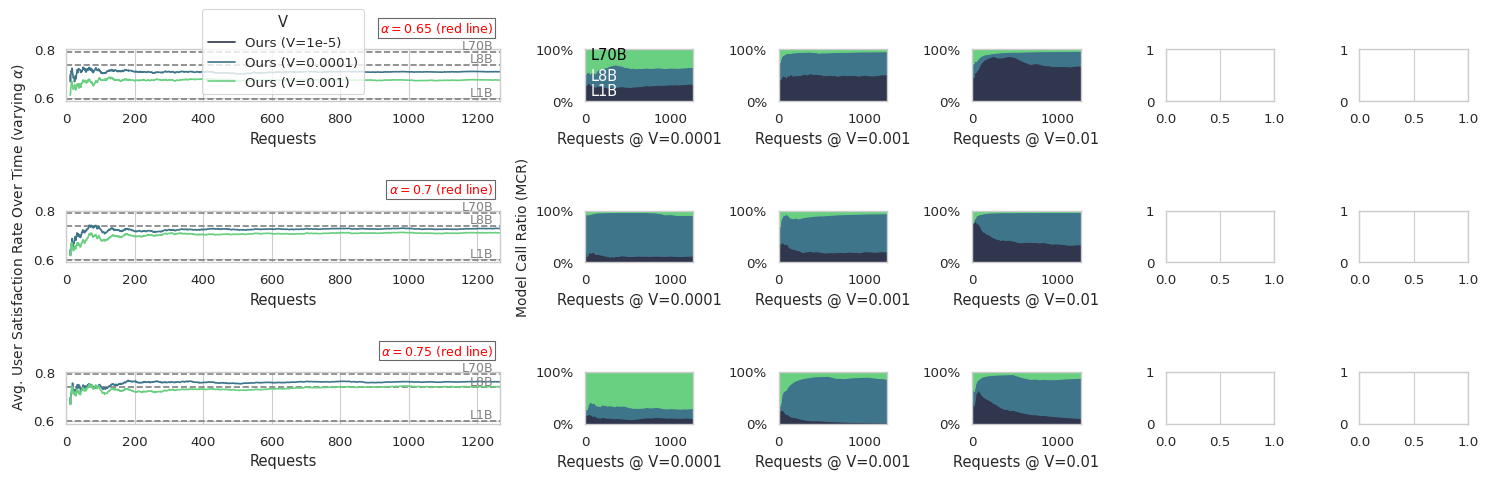

In [20]:
# Set the style for all plots
sns.set_style("whitegrid")
sns.set_palette(palette="dark:#5A9_r")

sns.set_theme(context='paper', style='whitegrid', palette='dark:#5A9_r', font='sans-serif', font_scale=1.1, color_codes=True, rc=None)

# Create a figure and a grid of subplots: 4 rows, 10 columns
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(15, 5), gridspec_kw={'width_ratios': [4, 1, 1, 1, 1, 1]})

# # Flatten the 2D array of axes for easier iteration
# axes = axes.flatten()

name = "winogrande"
subset = run_df.loc[(run_df["benchmark_name"] == name) & (run_df["c"] == 0.1) & (run_df["V"].isin(v_values_per_benchmark[name])) & (run_df["_step"] > 10)]
subset = subset.sort_values(by=["alpha"])

def format_v_value(b):
	if b < 0.0001:
		b = b * 100
		b = b / 100

	return f"Ours (V={b})"

subset["V"] = subset["V"].apply(format_v_value)

iterator = 0
for alpha in subset["alpha"].unique().tolist():
	v_values = subset["V"].unique().tolist()
	c_values = subset["c"].unique().tolist()

	# alpha = target_alpha_per_benchmark[name]

	# Accuracy Plot
	raw_inference_accuracies_per_model = infer_df[["benchmark_name", "label_small", "label_medium", "label_large"]].groupby("benchmark_name").mean().loc[name]

	axes[iterator][0].text(s="L1B", x=subset["_step"].max() - 20, y=raw_inference_accuracies_per_model["label_small"] + 0.01, color='gray', fontsize=9, ha="right")
	axes[iterator][0].text(s="L8B", x=subset["_step"].max() - 20, y=raw_inference_accuracies_per_model["label_medium"] + 0.01, color='gray', fontsize=9, ha="right")
	axes[iterator][0].text(s="L70B", x=subset["_step"].max() - 20, y=raw_inference_accuracies_per_model["label_large"] + 0.01, color='gray', fontsize=9, ha="right")
	axes[iterator][0].axhline(y=raw_inference_accuracies_per_model["label_small"], color='gray', linestyle='--')
	axes[iterator][0].axhline(y=raw_inference_accuracies_per_model["label_medium"], color='gray', linestyle='--')
	axes[iterator][0].axhline(y=raw_inference_accuracies_per_model["label_large"], color='gray', linestyle='--')

	sns.lineplot(
	    data=subset.loc[(subset["alpha"] == alpha)],
	    x="_step",
	    y="avg_accuracy",
	    hue="V",
		errorbar=None,
		ax=axes[iterator][0],
		legend=True if iterator == 0 else False,
		palette=["#2f364d", "#3f758a", "#69cf81"],
		hue_order=["Ours (V=1e-5)", "Ours (V=0.0001)", "Ours (V=0.001)"],
	)
    
	# Add alpha marker
	t1 = axes[iterator][0].text(s=r"$ \alpha = {alpha_val} $ (red line)".format(alpha_val=alpha), x=subset["_step"].max() - 20, y=1.15 * raw_inference_accuracies_per_model["label_large"] - 0.04, color='red', fontsize=9, ha="right")
	t1.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='black', pad=1.5))

	# Stackplot for Model Call Ratio
	v_values_per_benchmark[name] = sorted(v_values_per_benchmark[name], reverse=False)
	# v_values_per_benchmark[name].reverse()
	for jdx, V in enumerate(v_values_per_benchmark[name]):

		stack_df = subset.loc[
			(run_df["benchmark_name"] == name) &
			(run_df["V"] == V) &
			(subset["alpha"] == alpha),
			["_step", "models/small_chosen", "models/medium_chosen", "models/large_chosen"]
		].groupby(["_step"]).mean().reset_index()

		x = stack_df["_step"]
		y = stack_df[["models/small_chosen", "models/medium_chosen", "models/large_chosen"]]
		y_stack = np.cumsum(y, axis=1)

		axes[iterator][1 + jdx].fill_between(x, 0, y_stack.iloc[:, 0], color="#2f364d", alpha=1.0)
		axes[iterator][1 + jdx].fill_between(x, y_stack.iloc[:, 0], y_stack.iloc[:, 1], color="#3f758a", alpha=1.0)
		axes[iterator][1 + jdx].fill_between(x, y_stack.iloc[:, 1], y_stack.iloc[:, 2], color="#69cf81", alpha=1.0)
		axes[iterator][1 + jdx].set(xlabel=f"Requests @ V={V}", xlim=[0, subset.loc[(subset["alpha"] == alpha), "_step"].max()], ylim=[0, 1])
		axes[iterator][1 + jdx].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
		axes[iterator][1 + jdx].set(xlim=[0, stack_df["_step"].max()])

		if iterator == 0 and jdx == 0:
			axes[iterator][1 + jdx].text(s="L70B", x=70, y=0.80, color="black")
			axes[iterator][1 + jdx].text(s="L8B", x=70, y=0.40, color="white")
			axes[iterator][1 + jdx].text(s="L1B", x=70, y=0.10, color="white")

	axes[iterator][0].set(xlabel="Requests", xlim=[0, subset.loc[(subset["alpha"] == alpha), "_step"].max()])
	axes[iterator][0].set(ylabel=None)

	for ax, col in zip(axes[iterator], [r"Avg. User Satisfaction Rate Over Time (varying $\alpha$)".format(alpha_val=alpha), "Model Call Ratio (MCR)", "", ""]):

		if iterator == 1:
			ax.set_ylabel(col, rotation=90, size=10)

	iterator += 1

fig.tight_layout()
write_figure_to_disk(plt, file_name=f"{name}_all_alpha", chapter_name="evaluations")


Plot saved.


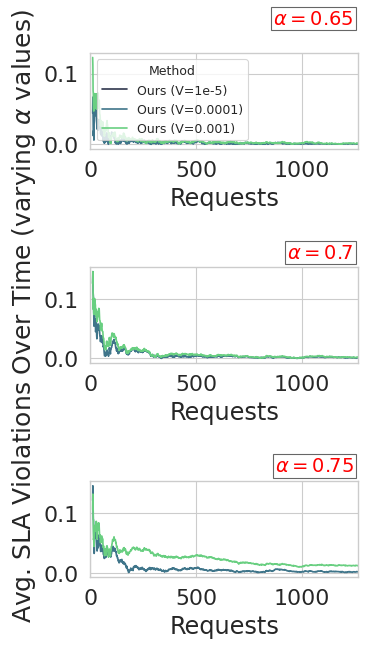

In [21]:
# Set the style for all plots
sns.set_style("whitegrid")
sns.set_palette(palette="dark:#5A9_r")

sns.set_theme(context='paper', style='whitegrid', palette='dark:#5A9_r', font='sans-serif', font_scale=1.8, color_codes=True, rc=None)

# Create a figure and a grid of subplots: 4 rows, 10 columns
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(4, 7))

# # Flatten the 2D array of axes for easier iteration
# axes = axes.flatten()

name = "winogrande"
subset = run_df.loc[(run_df["benchmark_name"] == name) & (run_df["c"] == 0.1) & (run_df["V"].isin(v_values_per_benchmark[name])) & (run_df["_step"] > 10)]
subset = subset.sort_values(by=["alpha"])

def format_v_value(b):
	if b < 0.0001:
		b = b * 100
		b = b / 100

	return f"Ours (V={b})"

subset["V"] = subset["V"].apply(format_v_value)

iterator = 0
for alpha in subset["alpha"].unique().tolist():
	v_values = subset["V"].unique().tolist()
	c_values = subset["c"].unique().tolist()

	# Q Plot for SLA violations
	subset.loc[(subset["alpha"] == alpha), "sla_violations"] = subset.loc[(subset["alpha"] == alpha), "mess_plus/q_length"] / subset.loc[(subset["alpha"] == alpha), "_step"]
	sns.lineplot(
	    data=subset.loc[(subset["alpha"] == alpha)],
	    x="_step",
	    y="sla_violations",
	    hue="V",
		errorbar=None,
		ax=axes[iterator],
		legend=True if iterator == 0 else False,
		palette=["#2f364d", "#3f758a", "#69cf81"],
		hue_order=["Ours (V=1e-5)", "Ours (V=0.0001)", "Ours (V=0.001)"],
	)

	# Add alpha marker
	t1 = axes[iterator].text(s=r"$ \alpha = {alpha_val} $".format(alpha_val=alpha), x=subset["_step"].max() - 20, y=0.17, color='red', fontsize=14, ha="right")
	t1.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='black', pad=1.5))

	if iterator == 0:
		axes[iterator].legend(ncols=1, title="Method", fontsize=9, title_fontsize=9, loc='upper left')

	axes[iterator].set(xlabel="Requests", xlim=[0, subset.loc[(subset["alpha"] == alpha), "_step"].max()])

	axes[iterator].set(ylabel=None)

	for ax, col in zip(axes, ["", r"Avg. SLA Violations Over Time (varying $\alpha$ values)", ""]):
		ax.set_ylabel(col, rotation=90, size=18)

	iterator += 1

fig.tight_layout()
write_figure_to_disk(plt, file_name=f"{name}_sla_violations", chapter_name="evaluations")

In [22]:
print(infer_df.columns)
print(infer_df.groupby("benchmark_name")["energy_consumption_large"].mean())
print(infer_df.groupby("benchmark_name")["energy_consumption_medium"].mean())
print(infer_df.groupby("benchmark_name")["energy_consumption_small"].mean())

Index(['index', 'input_text', 'benchmark_name', 'label_small',
       'acc_norm_small', 'energy_consumption_small', 'inference_time_small',
       'label_medium', 'acc_norm_medium', 'energy_consumption_medium',
       'inference_time_medium', 'label_large', 'acc_norm_large',
       'energy_consumption_large', 'inference_time_large', 'tokens_small',
       'tokens_medium', 'tokens_large', 'idx_original', 'acc_small',
       'acc_medium', 'acc_large'],
      dtype='object')
benchmark_name
arc_challenge       2002.590887
arc_easy            2029.806965
boolq               1040.777086
lambada_standard     512.046355
logiqa              2090.662626
piqa                1000.305741
sciq                2230.167317
social_iqa          1534.331063
winogrande          1018.422575
Name: energy_consumption_large, dtype: float64
benchmark_name
arc_challenge       393.661659
arc_easy            390.853256
boolq               130.735684
lambada_standard    101.083588
logiqa              418.320430
piq

In [23]:
# # Plot generator
#
# BENCHMARK_NAME_DICT = {
#     "arc_challenge": "ARC Challenge",
#     "arc_easy": "ARC Easy",
#     "boolq": "BoolQ",
#     # "lambada_standard": "Lambada",
#     "logiqa": "LogiQA",
#     # "logiqa2": "LogiQA2",
#     "piqa": "PiQA",
#     "sciq": "SciQ",
#     "social_iqa": "SocialIQA",
#     "winogrande": "WinoGrande",
# }
#
# # Create a list of all benchmark-alpha combinations
# benchmark_alpha_combinations = []
# for name in v_values_per_benchmark.keys():
#     config_path = Path(f"{NOTEBOOK_PATH.parent}/config/online/{name}.yaml")
#     with config_path.open("r") as f:
#         import yaml
#         CONFIG = yaml.safe_load(f)
#
#     algorithm_config = CONFIG["algorithm"]
#     for alpha in algorithm_config["alpha_values"]:
#         benchmark_alpha_combinations.append((name, alpha))
#
# # Initialize plotting variables
# plot_num = 0
# col_count = 0
#
# # Iterate through all benchmark-alpha combinations
# for combo_idx, (name, alpha) in enumerate(benchmark_alpha_combinations):
#
#     # Create new figure every 6 columns
#     if col_count == 0:
#         sns.set(style="whitegrid")
#         fig, axes = plt.subplots(nrows=7, ncols=6, figsize=(20, 12))
#         plot_num += 1
#
#     # Get current column index
#     col_idx = col_count
#
#     # Skip if this benchmark doesn't have V values configured
#     if name not in v_values_per_benchmark.keys():
#         continue
#
#     # Filter data for current benchmark and alpha
#     subset = run_df.loc[(run_df["benchmark_name"] == name) &
#                        (run_df["c"] == 0.1) &
#                        (run_df["V"].isin(v_values_per_benchmark[name])) &
#                        (run_df["_step"] > 10) &
#                        (run_df["alpha"] == alpha)]
#
#     v_values = subset["V"].unique().tolist()
#
#     # Accuracy Plot
#     raw_inference_accuracies_per_model = infer_df[["benchmark_name", "label_small", "label_medium", "label_large"]].groupby("benchmark_name").mean().loc[name]
#
#     axes[0][col_idx].text(s="Llama 3.1 1B", x=subset["_step"].min() + 20, y=raw_inference_accuracies_per_model["label_small"] + 0.025, color='gray', fontsize=8, ha="left")
#     axes[0][col_idx].text(s="Llama 3.1 8B", x=(subset["_step"].min() + 1/2 * subset["_step"].max()), y=raw_inference_accuracies_per_model["label_medium"] + 0.025, color='gray', fontsize=8, ha="center")
#     axes[0][col_idx].text(s="Llama 3.3 70B", x=subset["_step"].max() - 20, y=raw_inference_accuracies_per_model["label_large"] + 0.025, color='gray', fontsize=8, ha="right")
#     axes[0][col_idx].axhline(y=raw_inference_accuracies_per_model["label_small"], color='gray', linestyle='--')
#     axes[0][col_idx].axhline(y=raw_inference_accuracies_per_model["label_medium"], color='gray', linestyle='--')
#     axes[0][col_idx].axhline(y=raw_inference_accuracies_per_model["label_large"], color='gray', linestyle='--')
#
#     sns.lineplot(
#         data=subset.loc[(subset["alpha"] == alpha)],
#         x="_step",
#         y="avg_accuracy",
#         hue="V",
#         errorbar=None,
#         ax=axes[0][col_idx],
#         legend=True if col_idx == 0 else False,
# 	    palette=["#2f364d", "#3f758a", "#69cf81"]
#     )
#
#     axes[0][col_idx].plot(
# 		baseline_df.loc[(baseline_df["benchmark_name"] == name) & (baseline_df["alpha"] == alpha), "_step"],
# 		baseline_df.loc[(baseline_df["benchmark_name"] == name) & (baseline_df["alpha"] == alpha),"avg_accuracy"],
# 		color="violet", linestyle="dotted", label="Rand."
# 	)
#
#     axes[0][col_idx].axhline(y=alpha, color='red', linestyle='-')
#     axes[0][col_idx].text(s=r"$ \alpha = {alpha_val} $ ".format(alpha_val=alpha), x=subset["_step"].max() - 20, y=alpha + 0.01, color='red', fontsize=8, ha="right")
#
#     axes[0][col_idx].set(ylim=[0.97 * raw_inference_accuracies_per_model["label_small"], 1.15 * raw_inference_accuracies_per_model["label_large"]])
#
#     if col_idx == 0:
#         axes[0][col_idx].legend(ncols=2)
#
#     # Q Plot for SLA violations
#     subset.loc[(subset["alpha"] == alpha), "sla_violations"] = subset.loc[(subset["alpha"] == alpha), "mess_plus/q_length"] / subset.loc[(subset["alpha"] == alpha), "_step"]
#     sns.lineplot(
#         data=subset.loc[(subset["alpha"] == alpha)],
#         x="_step",
#         y="sla_violations",
#         hue="V",
#         errorbar=None,
#         ax=axes[1][col_idx],
#         legend=True if col_idx == 0 else False,
# 	    palette=["#2f364d", "#3f758a", "#69cf81"]
#     )
#
#     if col_idx == 0:
#         axes[1][col_idx].legend(ncols=2)
#
#     # Energy consumption plot
#     random_baseline_energy = baseline_df.loc[baseline_df["alpha"] == alpha, ["benchmark_name", "mess_plus/energy"]].groupby("benchmark_name").sum().loc[name].to_frame()
#     random_baseline_energy["V"] = "Rand."
#     random_baseline_energy["mess_plus/energy"] = random_baseline_energy[name]
#     random_baseline_energy.reset_index(inplace=True)
#
#     raw_inference_energy_data = infer_df[["benchmark_name", "energy_consumption_large", "energy_consumption_medium", "energy_consumption_small"]].groupby("benchmark_name").sum().loc[name].to_frame()
#     raw_inference_energy_data["V"] = raw_inference_energy_data.index
#     raw_inference_energy_data["mess_plus/energy"] = raw_inference_energy_data[name]
#     raw_inference_energy_data.rename({name: "mess_plus/energy"}, inplace=True)
#     raw_inference_energy_data.reset_index(inplace=True)
#
#     raw_inference_energy_data["V"] = raw_inference_energy_data["V"].replace({"energy_consumption_large": "70B", "energy_consumption_medium": "8B", "energy_consumption_small": "1B"}, inplace=False)
#
#     raw_inference_energy_data.drop([name, "index"], inplace=True, axis=1)
#     energy_data = subset.loc[(subset["alpha"] == alpha)].groupby(["_step", "V"]).agg({"mess_plus/energy": "mean"}).groupby("V")["mess_plus/energy"].sum().reset_index()
#
#     energy_data["V"] = energy_data["V"].apply(lambda sample: f"V={sample}")
#
#     energy_data = pd.concat([random_baseline_energy, raw_inference_energy_data, energy_data], ignore_index=True)
#     energy_data.reset_index(inplace=True)
#     energy_data = energy_data.sort_values(by=["mess_plus/energy"], ascending=False)
#
#     sns.barplot(
#         data=energy_data,
#         x="V",
#         y="mess_plus/energy",
#         ax=axes[2][col_idx],
#         errorbar=("ci", 0.95),
#     )
#
#     add_value_labels(axes[2][col_idx])
#     axes[2][col_idx].yaxis.set_major_formatter(plt.FuncFormatter(fmt_to_megajoules))
#     axes[2][col_idx].set(ylim=[0, 2 * energy_data["mess_plus/energy"].max()])
#     axes[2][col_idx].tick_params(axis='x', labelrotation=45)
#
#     # Stackplot for Model Call Ratio
#     for jdx, V in enumerate(v_values_per_benchmark[name]):
#
#         stack_df = subset.loc[
#             (run_df["benchmark_name"] == name) &
#             (run_df["V"] == V) &
#             (subset["alpha"] == alpha),
#             ["_step", "models/small_chosen", "models/medium_chosen", "models/large_chosen"]
#         ].groupby(["_step"]).mean().reset_index()
#
#         x = stack_df["_step"]
#         y = stack_df[["models/small_chosen", "models/medium_chosen", "models/large_chosen"]]
#         y_stack = np.cumsum(y, axis=1)
#
#         axes[3 + jdx][col_idx].fill_between(x, 0, y_stack.iloc[:, 0], color="#2f364d", alpha=0.95)
#         axes[3 + jdx][col_idx].fill_between(x, y_stack.iloc[:, 0], y_stack.iloc[:, 1], color="#3f758a", alpha=0.95)
#         axes[3 + jdx][col_idx].fill_between(x, y_stack.iloc[:, 1], y_stack.iloc[:, 2], color="#69cf81", alpha=0.95)
#         axes[3 + jdx][col_idx].set(xlabel=f"Request @ V={V}", xlim=[0, subset.loc[(subset["alpha"] == alpha), "_step"].max()], ylim=[0, 1])
#         axes[3 + jdx][col_idx].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
#
#         if jdx == 0 and col_idx == 0:
#             axes[3 + jdx][col_idx].legend(["Llama 3.1 1B", "Llama 3.1 8B", "Llama 3.3 70B"])
#
#     # Add area plot for random baseline with constraint.
#     baseline_stack_df = baseline_df.loc[
#             (baseline_df["benchmark_name"] == name) &
#             (baseline_df["alpha"] == alpha),
#             ["_step", "models/small_chosen", "models/medium_chosen", "models/large_chosen"]
#         ].groupby(["_step"]).mean().reset_index()
#
#     x_base = baseline_stack_df["_step"]
#     y_base = baseline_stack_df[["models/small_chosen", "models/medium_chosen", "models/large_chosen"]]
#     y_stack_base = np.cumsum(y_base, axis=1)
#
#     axes[6][col_idx].fill_between(x_base, 0, y_stack_base.iloc[:, 0], color="#2f364d", alpha=0.95)
#     axes[6][col_idx].fill_between(x_base, y_stack_base.iloc[:, 0], y_stack_base.iloc[:, 1], color="#3f758a", alpha=0.95)
#     axes[6][col_idx].fill_between(x_base, y_stack_base.iloc[:, 1], y_stack_base.iloc[:, 2], color="#69cf81", alpha=0.95)
#     axes[6][col_idx].set(xlabel=f"Requests (Rand.)", xlim=[0, baseline_stack_df["_step"].max()], ylim=[0, 1])
#     axes[6][col_idx].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
#     axes[6][col_idx].set(xlim=[0, baseline_stack_df["_step"].max()])
#
#     # Set axis properties
#     axes[0][col_idx].set(xlabel="Request", xlim=[0, subset.loc[(subset["alpha"] == alpha), "_step"].max()])
#     axes[1][col_idx].set(xlabel="Request", xlim=[0, subset.loc[(subset["alpha"] == alpha), "_step"].max()])
#     axes[2][col_idx].set(xlabel="")
#
#     # Remove y-labels for columns after the first
#     if col_idx > 0:
#         axes[0][col_idx].set(ylabel=None)
#         axes[1][col_idx].set(ylabel=None)
#         axes[2][col_idx].set(ylabel=None)
#
#     # Set title for each column
#     axes[0][col_idx].set_title(r"{bm_name} ($\alpha = {alpha_val} $)".format(bm_name=BENCHMARK_NAME_DICT[name], alpha_val=alpha))
#
#     # Increment column counter
#     col_count += 1
#
#     # Check if we need to save the current figure and start a new one
#     if col_count == 6 or combo_idx == len(benchmark_alpha_combinations) - 1:
#         # Add row labels
#         for idx, (ax, row) in enumerate(zip(axes[:,0], ["User Satisfaction", "SLA Violations", "Cost (in MJ energy)", "", "", "", ""])):
#             if idx == 5:
#                 fig.text(0.003, 0.225, "Model Call Ratio (MCR)", ha="center", rotation='vertical', fontsize=plt.rcParams['axes.labelsize'])
#             else:
#                 ax.set_ylabel(row, rotation=90, size='large')
#
#         # Save the figure
#         fig.tight_layout()
#         write_figure_to_disk(plt, file_name=f"benchmark_performance_plot_{plot_num}", chapter_name="evaluations")
#
#         # Reset column counter for next figure
#         col_count = 0

In [24]:
def build_pivot_table_for_main_results(input_df: pd.DataFrame, model_cols: list):

	latest_steps = input_df.groupby(['benchmark_name', 'alpha'])['_step'].transform('max')
	is_last_step = input_df['_step'] == latest_steps

	for col in model_cols:
		input_df = input_df.rename(columns={col: f"final_{col}"})

	# Create new columns with the final values
	# for col in model_cols:
	#     final_values = input_df.loc[is_last_step, ['benchmark_name', 'alpha', col]]
	#     final_values = final_values.drop_duplicates(['benchmark_name', 'alpha'])
	#     input_df = pd.merge(
	#         input_df,
	# 	    final_values.rename(columns={col: f"final_{col}"}),
	#         on=['benchmark_name', 'alpha'],
	#         how='left'
	#     )
	#
	# display(input_df.columns)

	# Add the final model values to the pivot table
	merged_pvt_table = input_df.loc[:, ["benchmark_name", "alpha", "V", "avg_accuracy", "step_cost_usd"] + [f"final_{col}" for col in model_cols]].pivot_table(
	    index=["benchmark_name", "alpha"],
	    columns=["V"],
	    values=["avg_accuracy", "step_cost_usd"] + [f"final_{col}" for col in model_cols],
	    aggfunc={
	        "avg_accuracy": ["mean", "std"],
	        "step_cost_usd": ["sum", "std"],
	        **{f"final_{col}": ['mean'] for col in model_cols}
	    }
	)

	return merged_pvt_table



In [34]:
# Create pivot tables

_PRICE_MILLION = {"1b": 0.06, "8b": 0.18, "70b": 0.88}
PRICE_PER_TOKEN = {k: v / 1_000_000 for k, v in _PRICE_MILLION.items()}
SIZE_KEY = {"small": "1b", "medium": "8b", "large": "70b"}

infer_df["step_cost_usd_small"]  = infer_df["tokens_small"]  * PRICE_PER_TOKEN[SIZE_KEY["small"]]
infer_df["step_cost_usd_medium"] = infer_df["tokens_medium"] * PRICE_PER_TOKEN[SIZE_KEY["medium"]]
infer_df["step_cost_usd_large"]  = infer_df["tokens_large"]  * PRICE_PER_TOKEN[SIZE_KEY["large"]]

pvt_base_model = (
    infer_df[
        [
            "benchmark_name",
            "step_cost_usd_large", "step_cost_usd_medium", "step_cost_usd_small",
            "label_small", "label_medium", "label_large",
        ]
    ]
    .pivot_table(
        index=["benchmark_name"],
        values=[
            "step_cost_usd_large", "step_cost_usd_medium", "step_cost_usd_small",
            "label_small", "label_medium", "label_large",
        ],
        aggfunc={
            "step_cost_usd_large":  ["sum", "std"],
            "step_cost_usd_medium": ["sum", "std"],
            "step_cost_usd_small":  ["sum", "std"],
            "label_small":          ["mean", "std"],
            "label_medium":         ["mean", "std"],
            "label_large":          ["mean", "std"],
        },
    )
)

pvt_base_model.columns = pd.MultiIndex.from_tuples(
    map(lambda x: (x[0], x[1], 2), pvt_base_model.columns)
)

new_cols = []
for col in pvt_base_model.columns:
    if col[0] == "step_cost_usd_small":
        new_cols.append(("step_cost_usd", col[1], 2))
    elif col[0] == "step_cost_usd_medium":
        new_cols.append(("step_cost_usd", col[1], 3))
    elif col[0] == "step_cost_usd_large":
        new_cols.append(("step_cost_usd", col[1], 4))
    elif col[0] == "label_small":
        new_cols.append(("avg_accuracy", col[1], 2))
    elif col[0] == "label_medium":
        new_cols.append(("avg_accuracy", col[1], 3))
    elif col[0] == "label_large":
        new_cols.append(("avg_accuracy", col[1], 4))

pvt_base_model.columns = pd.MultiIndex.from_tuples(new_cols, names=[None, None, "V"])

# Add the new "final_models/{size}_chosen" columns with values of 1.0
for size in ['small', 'medium', 'large']:
	num_size = 2
	if size == 'small':
		num_size = 2
	elif size == 'medium':
		num_size = 3
	elif size == "large":
		num_size = 4

	pvt_base_model[(f'final_models/{size}_chosen'), "first", num_size] = 1.0

# Sort the columns for better organization (by size group)
pvt_base_model = pvt_base_model.sort_index(axis=1, level=0)

# This is an intermediary step to average across seeds.
pvt_mess_plus = build_pivot_table_for_main_results(run_df, ["models/small_chosen", "models/medium_chosen", "models/large_chosen"])

combined_pivot = pd.concat([pvt_mess_plus], axis=1)

selected_pivot = combined_pivot.iloc[1::3]
selected_pivot = selected_pivot.query('benchmark_name != "lambada_standard" & benchmark_name != "logiqa2"')

print("All experiments combined")
def replace_level_0(idx_tuple):
	# Replace only 'A' with 'X', leave others unchanged
	benchmark_name_mapping = {
		"arc_challenge": r"ARC Challenge ($\alpha = 50\%$)",
		"arc_easy": r"ARC Easy ($\alpha = 75\%$)",
		"boolq": r"BoolQ  ($\alpha = 80\%$)",
		"logiqa": r"LogiQA ($\alpha = 40\%$)",
		"piqa": r"PiQA ($\alpha = 78\%$)",
		"sciq": r"SciQ ($\alpha = 96\%$)",
		"social_iqa": r"SocialIQA ($\alpha = 44\%$)",
		"winogrande": r"Winogrande ($\alpha = 70\%$)"
	}

	if type(idx_tuple) == tuple:
		return (benchmark_name_mapping[idx_tuple[0]], idx_tuple[1])
	else:
		return benchmark_name_mapping[idx_tuple]

# Apply the replacement function
new_index = selected_pivot.index.map(replace_level_0)
selected_pivot.index = pd.MultiIndex.from_tuples(new_index, names=selected_pivot.index.names)
# display(selected_pivot.columns.get_level_values(2))
selected_pivot = selected_pivot.droplevel('alpha', axis=0)
selected_pivot = selected_pivot.loc[:, (selected_pivot.columns.get_level_values(2) == 0.0001) | (selected_pivot.columns.get_level_values(2) == 100) | (selected_pivot.columns.get_level_values(2) == 1000) | (selected_pivot.columns.get_level_values(2) == 10000)]

pvt_base_model = pvt_base_model[~pvt_base_model.index.isin(["lambada_standard", "logiqa2"])]

# Merge pivot from single model experiments
pvt_base_model.index = pvt_base_model.index.map(replace_level_0)

selected_pivot = pd.concat([selected_pivot, pvt_base_model], axis=1)
benchmark_names = selected_pivot.index

# Step 2: Create a new MultiIndex from the stacked data
stacked_data = []
for v_value in selected_pivot.columns.get_level_values('V').unique():
	for b_name in benchmark_names:
		for metric in selected_pivot.columns.get_level_values(0).unique():
			for agg_type in selected_pivot.columns.get_level_values(1).unique():
				if (metric, agg_type, v_value) in selected_pivot.columns:
					value = selected_pivot.loc[b_name, (metric, agg_type, v_value)]
					stacked_data.append((v_value, b_name, metric, agg_type, value))


# Step 3: Create a new DataFrame from the stacked data
selected_pivot = pd.DataFrame(stacked_data, columns=['V', 'benchmark_name', 'metric', 'aggregation_type', 'value'])

# Step 4: Pivot to get the desired format
selected_pivot = selected_pivot.pivot(
	index='V',
	columns=['benchmark_name', 'metric', 'aggregation_type'],
	values='value'
)

# Re-order the rows
idx_new = []
for row in selected_pivot.index:
	if row < 1:
		idx_new.append(100000)
	else:
		idx_new.append(row)

selected_pivot.index = idx_new
selected_pivot.sort_index(inplace=True)

selected_pivot.index = ["Llama 1B", "Llama 8B", "Llama 70B", r"\textbf{MESS+ (ours)}"]
selected_pivot = selected_pivot.fillna(0)

def multiply_if_small(x):
	if isinstance(x, (int, float)) and x <= 1 and x != 0:  # Exclude zero if needed
		return x * 100
	return x

# Apply the function to all elements in the DataFrame
selected_pivot = selected_pivot.applymap(multiply_if_small)

selected_pivot.loc[:, (selected_pivot.columns.get_level_values(1) == "step_cost_usd") & (selected_pivot.columns.get_level_values(2) == "sum")] /= 1000000
selected_pivot.loc[:, (selected_pivot.columns.get_level_values(1) == "step_cost_usd") & (selected_pivot.columns.get_level_values(2) == "std")] /= 10000

selected_pivot.loc[selected_pivot.index == r"\textbf{MESS+ (ours)}", (selected_pivot.columns.get_level_values(1) == "step_cost_usd") & (selected_pivot.columns.get_level_values(2) == "sum")] /= 9

# We add a new "AVERAGE L1 ITEM
level2_level3_means = selected_pivot.groupby(level=[1, 2], axis=1).mean()
new_column_tuples = [('Mean',) + col for col in level2_level3_means.columns]
new_columns = pd.MultiIndex.from_tuples(new_column_tuples)

# Create a DataFrame with the new columns
means_df = pd.DataFrame(level2_level3_means.values, index=selected_pivot.index, columns=new_columns)

# Concatenate the original DataFrame with the means DataFrame
selected_pivot = pd.concat([selected_pivot, means_df], axis=1)

selected_pivot.loc[(selected_pivot.index == "Llama 1B") | (selected_pivot.index == "Llama 8B") | (selected_pivot.index == "Llama 70B"), (selected_pivot.columns.get_level_values(1) == "avg_accuracy") & (selected_pivot.columns.get_level_values(2) == "std")] /= 9 # We ran raw inference calls on 3 seeds and then ran our experiments on 3 seeds again, i.e., 3x3 = 9

selected_pivot.loc[(selected_pivot.index == "Llama 1B"), (selected_pivot.columns.get_level_values(1) == "final_models/small_chosen") & (selected_pivot.columns.get_level_values(2) == "mean")] = 1.0
selected_pivot.loc[(selected_pivot.index == "Llama 8B"), (selected_pivot.columns.get_level_values(1) == "final_models/medium_chosen") & (selected_pivot.columns.get_level_values(2) == "mean")] = 1.0
selected_pivot.loc[(selected_pivot.index == "Llama 70B"), (selected_pivot.columns.get_level_values(1) == "final_models/large_chosen") & (selected_pivot.columns.get_level_values(2) == "mean")] = 1.0


display(selected_pivot)

All experiments combined


/tmp/ipykernel_238039/770327046.py:155: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  selected_pivot = selected_pivot.applymap(multiply_if_small)
/tmp/ipykernel_238039/770327046.py:163: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  level2_level3_means = selected_pivot.groupby(level=[1, 2], axis=1).mean()


ARC Challenge ($\alpha = 50\%$)            \
                                         avg_accuracy             
                                                 mean       std   
Llama 1B                                    37.883959  5.392280   
Llama 8B                                    54.436860  5.536002   
Llama 70B                                   60.836177  5.425832   
\textbf{MESS+ (ours)}                       53.622979  2.927306   

                                                                            \
                      final_models/large_chosen final_models/medium_chosen   
                                           mean                       mean   
Llama 1B                               0.000000                   0.000000   
Llama 8B                               0.000000                   1.000000   
Llama 70B                              1.000000                   0.000000   
\textbf{MESS+ (ours)}                 42.544341                  38.144558   

                                                                             \
                      final_models/small_chosen step_cost_usd                 
                                           mean           std           sum   
Llama 1B                               1.000000  1.026777e-08  4.028580e-07   
Llama 8B                               0.000000  3.080331e-08  1.208574e-06   
Llama 70B                              0.000000  1.505940e-07  5.908584e-06   
\textbf{MESS+ (ours)}                 19.311101  2.192910e-07  2.679049e-06   

                      ARC Easy ($\alpha = 75\%$)            \
                                    avg_accuracy             
                                            mean       std   
Llama 1B                               63.002742  5.365023   
Llama 8B                               79.684644  4.471020   
Llama 70B                              83.180987  4.156420   
\textbf{MESS+ (ours)}                  76.956878  1.587496   

                                                 ...         Mean            \
                      final_models/large_chosen  ... avg_accuracy             
                                           mean  ...         mean       std   
Llama 1B                               0.000000  ...    58.237080  4.910708   
Llama 8B                               0.000000  ...    68.533983  4.510576   
Llama 70B                              1.000000  ...    74.100032  4.348113   
\textbf{MESS+ (ours)}                 24.433942  ...    68.416614  2.501507   

                                                            \
                      final_models/large_chosen              
                                          first       mean   
Llama 1B                                    0.0   0.000000   
Llama 8B                                    0.0   0.000000   
Llama 70B                                 100.0   1.000000   
\textbf{MESS+ (ours)}                       0.0  34.532967   

                                                            \
                      final_models/medium_chosen             
                                           first      mean   
Llama 1B                                     0.0   0.00000   
Llama 8B                                   100.0   1.00000   
Llama 70B                                    0.0   0.00000   
\textbf{MESS+ (ours)}                        0.0  37.31063   

                                                                          \
                      final_models/small_chosen            step_cost_usd   
                                          first       mean           std   
Llama 1B                                  100.0   1.000000  4.311132e-09   
Llama 8B                                    0.0   0.000000  1.293340e-08   
Llama 70B                                   0.0   0.000000  6.322993e-08   
\textbf{MESS+ (ours)}                       0.0  28.156403  1.636322e-07   

                                     
                     

In [46]:
selected_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Llama 1B to \textbf{MESS+ (ours)}
Data columns (total 90 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   (ARC Challenge ($\alpha = 50\%$), avg_accuracy, mean)                 4 non-null      float64
 1   (ARC Challenge ($\alpha = 50\%$), avg_accuracy, std)                  4 non-null      float64
 2   (ARC Challenge ($\alpha = 50\%$), final_models/large_chosen, mean)    4 non-null      float64
 3   (ARC Challenge ($\alpha = 50\%$), final_models/medium_chosen, mean)   4 non-null      float64
 4   (ARC Challenge ($\alpha = 50\%$), final_models/small_chosen, mean)    4 non-null      float64
 5   (ARC Challenge ($\alpha = 50\%$), step_cost_usd, std)                 4 non-null      float64
 6   (ARC Challenge ($\alpha = 50\%$), step_cost_usd, sum)                 4 non-null

In [47]:
random_baseline_df = download_log_data(
    entity="tum-i13",
    project_name="mess_plus_random_baseline_with_step_cost_usd",
    save_dir=DATA_DIR,
    batch_size=50
)

2025-07-29 11:48:00,045 - evaluations.utils.wandb_loader - INFO - Loaded checkpoint: 2076 runs already processed
2025-07-29 11:48:01,279 - evaluations.utils.wandb_loader - INFO - Found 30 total runs in project


2025-07-29 11:48:02,240 - evaluations.utils.wandb_loader - INFO - Download complete! Downloaded 2076 runs
2025-07-29 11:48:02,243 - evaluations.utils.wandb_loader - INFO - All data saved to /mnt/c/Users/devmo/Desktop/SciRes/mess-plus-project/mess-plus/evaluations/data/online


In [48]:
# union of all keys in the summary dicts (i.e. final metrics)
summary_keys = set().union(*random_baseline_df["summary"].apply(lambda d: d.keys()))
print("Logged summary keys:", summary_keys)

# union of all keys in the config dicts (i.e. hyperparams & flags)
config_keys = set().union(*random_baseline_df["config"].apply(lambda d: d.keys()))
print("Logged config keys:", config_keys)

Logged summary keys: {'mess_plus/x_t', 'step_cost_usd', 'mess_plus/p_t', 'mess_plus/energy', 'V', 'mess_plus/chosen_model', 'running_total_cost_usd', 'models/large_chosen', 'model_choice', 'avg_accuracy', 'running_avg_cost_usd', 'step_time', 'total_runtime', 'pricing_scheme', 'mess_plus/step_cost_usd', 'c', 'models/small_chosen', 'mess_plus/exploration_step_ratio', 'mess_plus/q_length', 'random_seed', 'models/medium_chosen', 'alpha', 'classifier/train_loss'}
Logged config keys: {'model_zoo', 'algorithm', 'lm_eval', 'classifier_model', 'seed', 'run_name'}


In [61]:
random_baseline_df.head()

,id,name,path,url,created_at,tags,summary,config
0,sdpceri2,arc_challenge_V=0.1_a=0.4_c=1.0_seed=42_togeth...,"[tum-i13, mess-plus-api-pricing, sdpceri2]",https://wandb.ai/tum-i13/mess-plus-api-pricing...,2025-06-04T15:32:09Z,[],"{'V': 0.1, 'alpha': 0.4, 'avg_accuracy': 0.433...","{'seed': 43, 'lm_eval': {'benchmarks': ['arc_c..."
1,nd28d4mz,boolq_V=0.1_a=0.7_c=1.0_seed=42_together.ai,"[tum-i13, mess-plus-api-pricing, nd28d4mz]",https://wandb.ai/tum-i13/mess-plus-api-pricing...,2025-06-04T15:32:11Z,[],"{'V': 0.1, 'alpha': 0.7, 'avg_accuracy': 0.723...","{'seed': 43, 'lm_eval': {'benchmarks': ['boolq..."
2,esc9qwqc,arc_easy_V=0.1_a=0.65_c=1.0_seed=42_together.ai,"[tum-i13, mess-plus-api-pricing, esc9qwqc]",https://wandb.ai/tum-i13/mess-plus-api-pricing...,2025-06-04T15:32:12Z,[],"{'V': 0.1, 'alpha': 0.65, 'avg_accuracy': 0.66...","{'seed': 43, 'lm_eval': {'benchmarks': ['arc_e..."
3,x8xkfgsp,logiqa_V=0.1_a=0.3_c=1.0_seed=42_together.ai,"[tum-i13, mess-plus-api-pricing, x8xkfgsp]",https://wandb.ai/tum-i13/mess-plus-api-pricing...,2025-06-04T15:32:13Z,[],"{'V': 0.1, 'alpha': 0.3, 'avg_accuracy': 0.320...","{'seed': 43, 'lm_eval': {'benchmarks': ['logiq..."
4,tlcbkfq4,lambada_standard_V=0.1_a=0.3_c=1.0_seed=42_tog...,"[tum-i13, mess-plus-api-pricing, tlcbkfq4]",https://wandb.ai/tum-i13/mess-plus-api-pricing...,2025-06-04T15:32:14Z,[],"{'V': 0.1, 'alpha': 0.3, 'avg_accuracy': 0.529...","{'seed': 43, 'lm_eval': {'benchmarks': ['lamba..."


In [67]:
random_baseline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076 entries, 0 to 2075
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          2076 non-null   object
 1   name        2076 non-null   object
 2   path        2076 non-null   object
 3   url         2076 non-null   object
 4   created_at  2076 non-null   object
 5   tags        2076 non-null   object
 6   summary     2076 non-null   object
 7   config      2076 non-null   object
dtypes: object(8)
memory usage: 129.9+ KB


In [59]:
list(random_baseline_df["summary"][0])

['V',
 'alpha',
 'avg_accuracy',
 'c',
 'classifier/train_loss',
 'mess_plus/chosen_model',
 'mess_plus/exploration_step_ratio',
 'mess_plus/p_t',
 'mess_plus/q_length',
 'mess_plus/step_cost_usd',
 'mess_plus/x_t',
 'models/large_chosen',
 'models/medium_chosen',
 'models/small_chosen',
 'pricing_scheme',
 'random_seed',
 'running_avg_cost_usd',
 'step_cost_usd',
 'step_time',
 'total_runtime']

In [65]:
list(random_baseline_df["config"][0])

['seed', 'lm_eval', 'run_name', 'algorithm', 'model_zoo', 'classifier_model']

In [ ]:
import pandas as pd
import numpy as np
import re

# 1) Flatten the summary dicts into real columns
flat = pd.concat(
    [
        random_baseline_df.drop(columns=["summary", "config"], errors="ignore"),
        pd.json_normalize(random_baseline_df["summary"]),
    ],
    axis=1,
)

# 2) Parse out the LM‐Eval task name and α threshold from the run “name”
#    Assumes names like "boolq_V=0.1_a=0.7_c=1.0_seed=42_together.ai"
flat["dataset_key"] = flat["name"].str.extract(r"^([^_]+)")
flat["alpha"]       = flat["alpha"].astype(float)
flat["task_name"]   = (
    flat["dataset_key"]
        .str.upper()
        .str.replace(r"BOOLQ", "BoolQ")   # fix casing if you like
        .str.replace(r"ARCCHALLENGE", "ARC Challenge")
        .str.replace(r"ARCEASY",      "ARC Easy")
        .str.replace(r"LOGIQA",       "LogiQA")
        .str.replace(r"PIQA",         "PiQA")
        .str.replace(r"SCIQ",         "SciQ")
        .str.replace(r"SOCIALIQA",    "SocialIQA")
        .str.replace(r"WINOGRANDE",   "Winogrande")
        + " (α = " 
        + (flat["alpha"]*100).round().astype(int).astype(str) 
        + "%)"
)

# 3) Build the list of values in the same order as selected_pivot.columns
random_values = []
for task, metric, stat in selected_pivot.columns:
    subset = flat.loc[flat["task_name"] == task, metric]
    if stat == "mean":
        v = subset.mean()
    elif stat == "std":
        v = subset.std()
    elif stat == "sum":
        v = subset.sum()
    elif stat == "first":
        v = subset.iloc[0] if not subset.empty else np.nan
    else:
        v = np.nan
    random_values.append(v)

# 4) Construct the one‐row DataFrame
random_baseline_row = pd.DataFrame(
    [random_values],
    columns=selected_pivot.columns,
    index=["Random Baseline"],
)

# Now `random_baseline_row` has exactly the same 90 MultiIndex columns as `selected_pivot`.
# Inspect it:
random_baseline_row


In [26]:
import math
import re

# CREATE LATEX TABLE
def multiindex_df_to_latex_chunked(
		df,
		chunk_size=3,
		level2_order=None,
		caption_template="Results Table Part {}",
		label_template="tab:results_part{}", include_index=True
):
	# Get unique level 1 items
	level1_items = df.columns.get_level_values(0).unique()

	# Get level 2 items (either in specified order or existing order)
	if level2_order is None:
		level2_items = df.columns.get_level_values(1).unique()
	else:
		# Verify all specified level2 items exist in the DataFrame
		existing_level2 = df.columns.get_level_values(1).unique()
		for item in level2_order:
			if item not in existing_level2:
				raise ValueError(f"Level 2 item '{item}' not found in DataFrame")
		level2_items = level2_order

	# Calculate number of chunks
	num_chunks = math.ceil(len(level1_items) / chunk_size)

	latex_tables = []

	# Process each chunk
	for chunk_idx in range(num_chunks):
		start_idx = chunk_idx * chunk_size
		end_idx = min((chunk_idx + 1) * chunk_size, len(level1_items))

		# Get level 1 items for this chunk
		chunk_level1_items = level1_items[start_idx:end_idx]

		# Filter DataFrame to only include these level 1 items
		chunk_columns = [col for col in df.columns if col[0] in chunk_level1_items]
		chunk_df = df[chunk_columns]

		# Create a new DataFrame for the LaTeX output with the same higher-level structure
		# Get unique combinations of first two levels in this chunk
		higher_levels = chunk_df.columns.droplevel(2).unique()

		# Create new DataFrame with appropriate multi-index
		result_df = pd.DataFrame(index=df.index)
		result_cols = []

		# For each combination of higher levels, combine mean and std
		all_alph = []
		for level1 in chunk_level1_items:
			pattern = r"\\alpha\s*=\s*(\d+)\\%"
			match = re.search(pattern, level1)
			if match:
			    number = match.group(1)  # This will be "50" as a string
			    number_int = int(number)  # Convert to integer if needed
			else:
			    print("No number found")
			    number_int = 0

			alph = number_int
			all_alph.append(alph)

			for level2 in level2_items:
				if "final_models/large" in level2:
					name = r"\thead{Model Call Ratio \\ (L70B/L8B/L1B)}"
					result_df[(level1, name)] = [f"{x:.0f}\\% / {y:.0f}\\% / {z:.0f}\\%" for x, y, z in zip(df[(level1, "final_models/large_chosen", "mean")], df[(level1, "final_models/medium_chosen", "mean")], df[(level1, "final_models/small_chosen", "mean")])]
					result_cols.append((level1, name))
					continue

				try:
					if level2 == "avg_accuracy":
						name = r"\thead{Request. \\ Satisfaction}"
						level3 = "mean"

						mean_val = df[level1, level2, level3]
						std_val = df[level1, level2, 'std']

						if level1 == "Mean":
							alph = 66.625

						vals = []
						for m, s in zip(mean_val, std_val):
							if m >= alph:
								vals.append(f"\\textcolor{{darkgreen}}{{{m:.2f}$\\scriptscriptstyle\\pm{s:.2f}$}}")
							else:
								vals.append(f"\\textcolor{{red}}{{{m:.2f}$\\scriptscriptstyle\\pm{s:.2f}$}}")

					elif level2 == "step_cost_usd":
						name = r"\thead{Operating \\ Cost}"
						level3 = "sum"
						mean_val = df[level1, level2, level3]
						std_val = df[level1, level2, 'std']
						min_mean_val = mean_val[3:].min()

						mean_acc = df[level1, "avg_accuracy", "mean"]
						if level1 == "Mean":
							alph = 66.625

						vals = []
						acc_match = mean_acc[:3] >= alph
						is_min_single_satisfying = np.where(acc_match == True)[0]

						for idx, (m, s) in enumerate(zip(mean_val, std_val)):
							if m == mean_val[3:].min():
								vals.append(f"\\textbf{{{m:.2f}$\\scriptscriptstyle\\pm{s:.2f}$}}")
							elif idx == is_min_single_satisfying[0]:
								vals.append(f"\\underline{{{m:.2f}$\\scriptscriptstyle\\pm{s:.2f}$}}")
							else:
								vals.append(f"{m:.2f}$\\scriptscriptstyle\\pm{s:.2f}$")

					else:
						name = level2
						level3 = "mean"
						mean_val = df[level1, level2, level3]
						std_val = df[level1, level2, 'std']
						vals = [f"{m:.2f}$\\scriptscriptstyle\\pm{s:.2f}$" for m, s in zip(mean_val, std_val)]

					result_df[(level1, name)] = vals
					result_cols.append((level1, name))

				except KeyError:
					# Skip if mean or std not available
					print(f"Warning: Missing mean or std for {level1}, {level2}")

		# Set the columns with multi-index (preserving top 2 levels)
		result_df.columns = pd.MultiIndex.from_tuples(result_cols, names=['Category', 'Subcategory'])

		# Convert to LaTeX with multi-index
		caption = caption_template.format(chunk_idx + 1)
		label = label_template.format(chunk_idx + 1)

		latex_str = result_df.to_latex(escape=False, multicolumn=True, multicolumn_format='c', index=include_index)

		# Add caption and label
		latex_str = latex_str.replace('\\begin{tabular}',
		                              f'\\begin{{table}}\n\\caption{{{caption}}}\n\\label{{{label}}}\n\\begin{{tabular}}')
		latex_str = latex_str + '\\end{table}'

		latex_tables.append(latex_str)

	return latex_tables


latex_tables = multiindex_df_to_latex_chunked(
	selected_pivot,
	chunk_size=3,
	caption_template="Results Table Part {}: Categories",
	label_template="tab:results_part{}",
	level2_order=["step_cost_usd", "avg_accuracy", "final_models/large_chosen"]
)

for t in latex_tables:
	print(t)

No number found
\begin{table}
\caption{Results Table Part 1: Categories}
\label{tab:results_part1}
\begin{tabular}{llllllllll}
\toprule
Category & \multicolumn{3}{c}{ARC Challenge ($\alpha = 50\%$)} & \multicolumn{3}{c}{ARC Easy ($\alpha = 75\%$)} & \multicolumn{3}{c}{BoolQ  ($\alpha = 80\%$)} \\
Subcategory & \thead{Operating \\ Cost} & \thead{Request. \\ Satisfaction} & \thead{Model Call Ratio \\ (L70B/L8B/L1B)} & \thead{Operating \\ Cost} & \thead{Request. \\ Satisfaction} & \thead{Model Call Ratio \\ (L70B/L8B/L1B)} & \thead{Operating \\ Cost} & \thead{Request. \\ Satisfaction} & \thead{Model Call Ratio \\ (L70B/L8B/L1B)} \\
\midrule
Llama 1B & 0.09$\scriptscriptstyle\pm0.00$ & \textcolor{red}{37.88$\scriptscriptstyle\pm5.39$} & 0\% / 0\% / 1\% & 0.36$\scriptscriptstyle\pm0.00$ & \textcolor{red}{63.00$\scriptscriptstyle\pm5.37$} & 0\% / 0\% / 1\% & 0.14$\scriptscriptstyle\pm0.00$ & \textcolor{red}{69.17$\scriptscriptstyle\pm5.13$} & 0\% / 0\% / 1\% \\
Llama 8B & \underline{0.46$\sc

2025-07-29 11:31:21,572 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-29 11:31:21,724 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-29 11:31:37,155 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-29 11:31:37,481 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-07-29 11:31:47,

Plot saved.


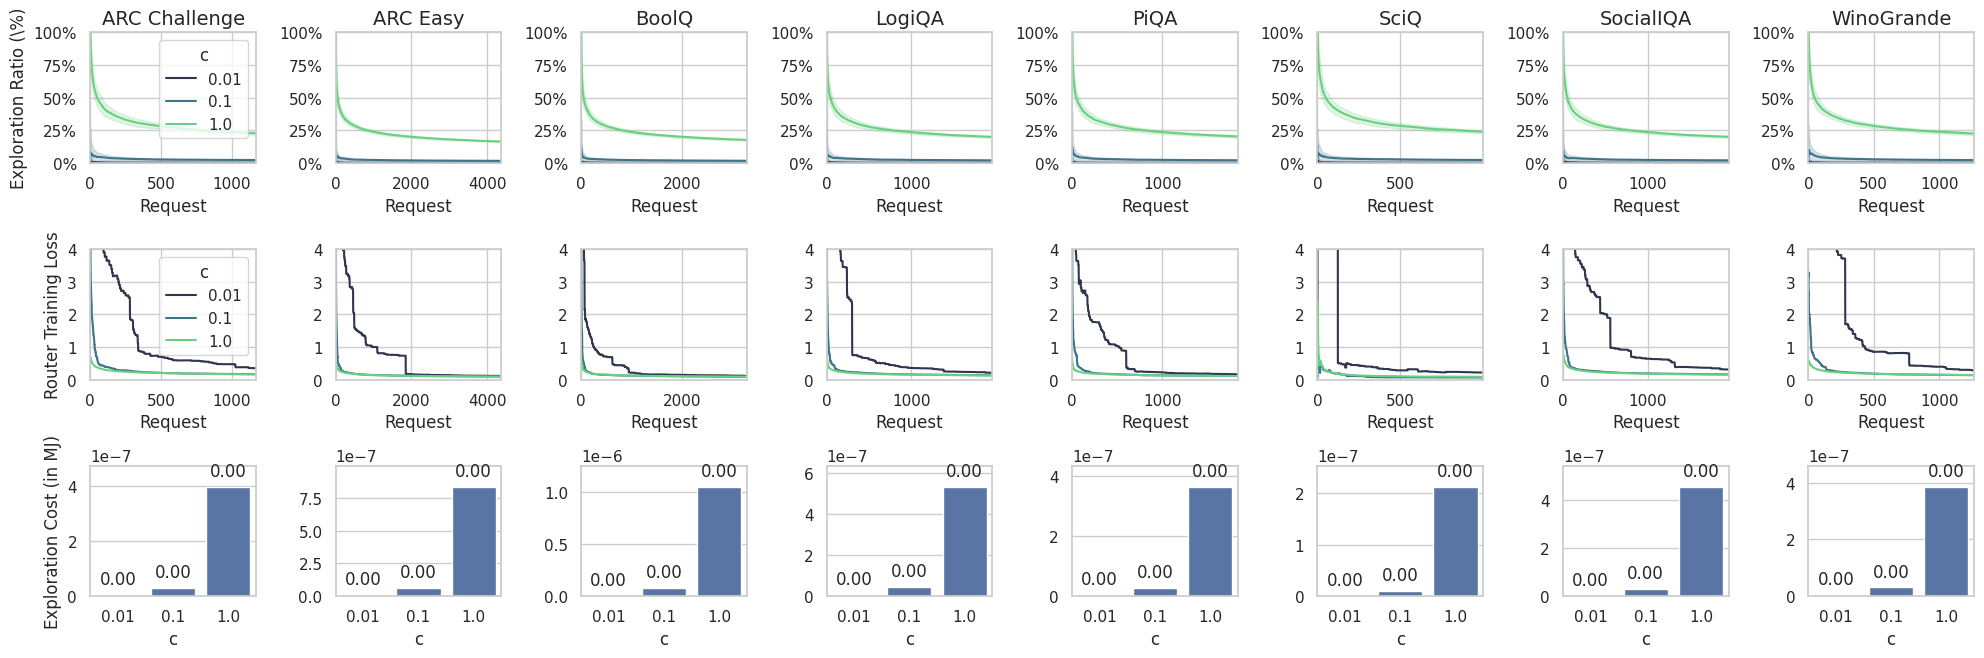

In [27]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=8, figsize=(20, 6.75))

BENCHMARK_NAME_DICT = {
    "arc_challenge": "ARC Challenge",
    "arc_easy": "ARC Easy",
    "boolq": "BoolQ",
    # "lambada_standard": "Lambada",
    "logiqa": "LogiQA",
    # "logiqa2": "LogiQA2",
    "piqa": "PiQA",
    "sciq": "SciQ",
    "social_iqa": "SocialIQA",
    "winogrande": "WinoGrande",
}

iterator = 0
for name, display_name in BENCHMARK_NAME_DICT.items():

	plt_data = run_df.loc[(run_df["benchmark_name"] == name), ["c", "step_cost_usd", "classifier/train_loss", "_step", "mess_plus/exploration_step_ratio", "mess_plus/p_t"]]

	plt_data["exploration_cost"] = plt_data["step_cost_usd"] * plt_data["mess_plus/p_t"]

	sns.lineplot(
	    data=plt_data[["_step", "mess_plus/exploration_step_ratio", "c"]],
	    x="_step",
	    y="mess_plus/exploration_step_ratio",
	    hue="c",
		errorbar=("sd", 1),
		ax=axes[0][iterator],
		legend=True if iterator == 0 else False,
		palette=["#2f364d", "#3f758a", "#69cf81"]
	)

	plt_data.loc[plt_data["c"] == 0.1, "classifier/train_loss"] /= 0.1
	plt_data.loc[plt_data["c"] == 0.01, "classifier/train_loss"] /= 0.01

	sns.lineplot(
	    data=plt_data[["_step", "classifier/train_loss", "c"]],
	    x="_step",
	    y="classifier/train_loss",
	    hue="c",
		errorbar=None, # ("sd", 1),
		ax=axes[1][iterator],
		legend=True if iterator == 0 else False,
		palette=["#2f364d", "#3f758a", "#69cf81"]
	)

	# bar_data = plt_data[["_step", "mess_plus/energy", "c"]].groupby(["c"], as_index=False).sum()
	plt_data["exploration_cost"] = plt_data["exploration_cost"] / 1_000_000 # convert to MJ
	sns.barplot(
	    data=plt_data,
	    x="c",
	    y="exploration_cost",
		errorbar=("sd", 1),
		ax=axes[2][iterator],
		legend=False,
		estimator=np.sum
	)

	axes[0][iterator].set_xlim([0, plt_data["_step"].max()])
	axes[0][iterator].set_ylim([0, 1])
	axes[0][iterator].set_xlabel("Request")
	axes[1][iterator].set_xlabel("Request")
	axes[0][iterator].set_title(display_name, fontsize=14)
	axes[0][iterator].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

	axes[1][iterator].set_ylim([0, 4])
	axes[1][iterator].set_xlim([0, plt_data["_step"].max()])

	axes[2][iterator].set_ylim([0, 1.2 * plt_data.groupby("c")["exploration_cost"].sum().max()])
	add_value_labels(axes[2][iterator], convert_to_mj=False)

	if iterator == 0:
		axes[0][iterator].set_ylabel("Exploration Ratio (\%)")
		axes[1][iterator].set_ylabel("Router Training Loss")
		axes[2][iterator].set_ylabel("Exploration Cost (in MJ)")
		axes[0][iterator].legend(title="c")
	else:
		axes[0][iterator].set_ylabel(None)
		axes[1][iterator].set_ylabel(None)
		axes[2][iterator].set_ylabel(None)

	iterator += 1

plt.tight_layout()
write_figure_to_disk(plt, file_name="c_ablation_study", chapter_name="evaluations")

2025-07-29 11:32:25,837 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/tmp/ipykernel_238039/3862687655.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
2025-07-29 11:32:25,888 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Plot saved.


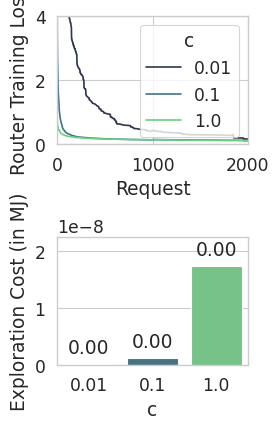

In [28]:
C_BENCHMARK = "winogrande"

sns.set_theme(context='paper', style='whitegrid', palette='dark:#5A9_r', font='sans-serif', font_scale=1.4, color_codes=True, rc=None)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(3, 4.5))

# (run_df["benchmark_name"] == C_BENCHMARK)
plt_data = run_df.loc[:, ["c", "step_cost_usd", "classifier/train_loss", "_step", "mess_plus/exploration_step_ratio", "mess_plus/p_t"]]

plt_data["exploration_cost"] = plt_data["step_cost_usd"] * plt_data["mess_plus/p_t"]

# sns.lineplot(
#     data=plt_data[["_step", "mess_plus/exploration_step_ratio", "c"]],
#     x="_step",
#     y="mess_plus/exploration_step_ratio",
#     hue="c",
# 	errorbar=("sd", 1),
# 	ax=axes[0],
# 	legend=True,
# 	palette=["#2f364d", "#3f758a", "#69cf81"]
# )

plt_data.loc[plt_data["c"] == 0.1, "classifier/train_loss"] /= 0.1
plt_data.loc[plt_data["c"] == 0.01, "classifier/train_loss"] /= 0.01

sns.lineplot(
    data=plt_data[["_step", "classifier/train_loss", "c"]],
    x="_step",
    y="classifier/train_loss",
    hue="c",
	errorbar=None, # ("sd", 1),
	ax=axes[0],
	legend=True,
	palette=["#2f364d", "#3f758a", "#69cf81"]
)

# bar_data = plt_data[["_step", "mess_plus/energy", "c"]].groupby(["c"], as_index=False).sum()
plt_data["exploration_cost"] = plt_data["exploration_cost"] / 1_000_000 # convert to MJ
sns.barplot(
    data=plt_data.groupby(["_step", "c"]).mean(),
    x="c",
    y="exploration_cost",
	errorbar=("sd", 1),
	ax=axes[1],
	legend=False,
	estimator=np.sum,
	palette=["#2f364d", "#3f758a", "#69cf81"]
)

# axes[0].set_xlim([0, plt_data["_step"].max()])
# axes[0].set_ylim([0, 1])
# axes[0].set_xlabel("Request")
axes[0].set_xlabel("Request")
# axes[0].set_title("ARC Challenge", fontsize=14)
# axes[0].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

axes[0].set_ylim([0, 4])
axes[0].set_xlim([0, 2000])

axes[1].set_ylim([0, 1.2 * plt_data.groupby(["_step", "c"]).mean()["exploration_cost"].sum().max()])
add_value_labels(axes[1], convert_to_mj=False)

# axes[0].set_ylabel("Exploration Ratio (\%)")
axes[0].set_ylabel("Router Training Loss")
axes[1].set_ylabel("Exploration Cost (in MJ)")
# axes[0].legend(title="c")


plt.tight_layout()
write_figure_to_disk(plt, file_name=f"c_ablation_study_{C_BENCHMARK}", chapter_name="evaluations")

Plot saved.


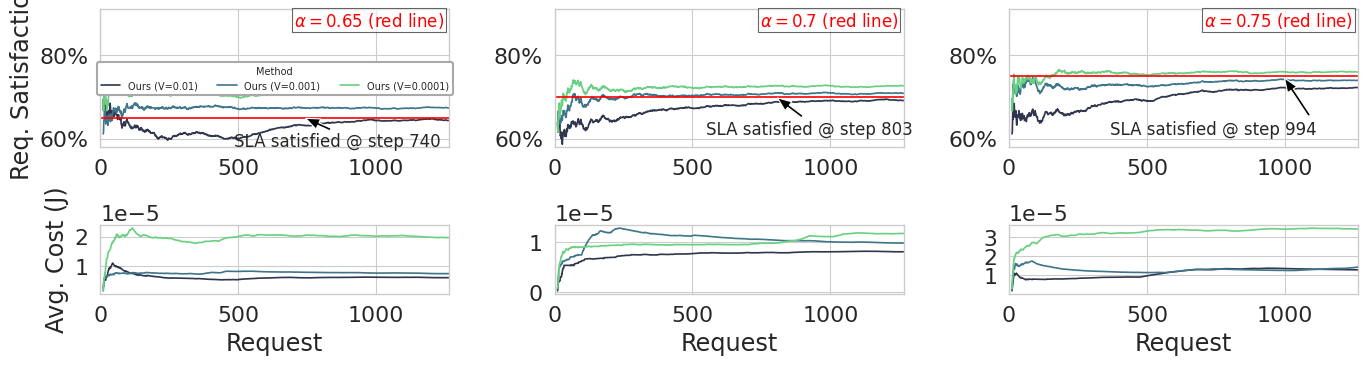

In [29]:
# FINAL PLOT: Report on alpha & V dynamics regarding cost and request satisfaction

# Set the style for all plots
sns.set_style("whitegrid")
sns.set_palette(palette="dark:#5A9_r")

sns.set_theme(context='paper', style='whitegrid', palette='dark:#5A9_r', font='sans-serif', font_scale=1.8, color_codes=True, rc=None)

# Create a figure and a grid of subplots: 4 rows, 10 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 4), gridspec_kw={'height_ratios': [2, 1]})

# # Flatten the 2D array of axes for easier iteration
# axes = axes.flatten()

name = "winogrande"
subset = run_df.loc[(run_df["benchmark_name"] == name) & (run_df["c"] == 0.1) & (run_df["V"].isin(v_values_per_benchmark[name])) & (run_df["_step"] > 10)]
subset = subset.sort_values(by=["alpha"])

def format_v_value(b):
	if b < 0.0001:
		b = b * 100
		b = b / 100

	return f"Ours (V={b})"

subset["V"] = subset["V"].apply(format_v_value)

iterator = 0
for alpha in subset["alpha"].unique().tolist():
	v_values = subset["V"].unique().tolist()
	c_values = subset["c"].unique().tolist()

	# Accuracy Plot
	raw_inference_accuracies_per_model = infer_df[["benchmark_name", "label_small", "label_medium", "label_large"]].groupby("benchmark_name").mean().loc[name]

	sns.lineplot(
	    data=subset.loc[(subset["alpha"] == alpha)],
	    x="_step",
	    y="avg_accuracy",
	    hue="V",
		errorbar=None,
		ax=axes[0][iterator],
		legend=True if iterator == 0 else False,
		palette=["#2f364d", "#3f758a", "#69cf81"],
		hue_order=["Ours (V=0.01)", "Ours (V=0.001)", "Ours (V=0.0001)"],
	)

	if alpha == 0.65:
		step = 740
		y = 0.62
		offset = 0.04
		ha = "center"
	elif alpha == 0.7:
		step = 803
		y = 0.65
		offset = 0.04
		ha = "center"
	else:
		step = 994
		y = 0.65
		offset = 0.04
		ha = "right"

	axes[0][iterator].annotate('',
        xy=(step, alpha),         # tip of the arrow (endpoint)
        xytext=(step + 100, y),       # start point of the arrow
        arrowprops=dict(
            facecolor='black',
            shrink=0.05,      # how much to shrink the arrow from the endpoints
            width=2,          # width of arrow in points
            headwidth=8,      # width of arrow head in points
            headlength=10     # length of arrow head in points
        ))

	axes[0][iterator].text(step + 120, y - offset, f"SLA satisfied @ step {step}", fontsize=12, ha=ha)

	if iterator == 0:
		axes[0][iterator].legend(loc="center", ncol=6, title="Method", fontsize=7, title_fontsize=7)

	axes[0][iterator].axhline(y=alpha, color='red', linestyle='-', label="alpha")
	axes[0][iterator].set(ylim=[0.97 * raw_inference_accuracies_per_model["label_small"], 1.15 * raw_inference_accuracies_per_model["label_large"]])
	axes[0][iterator].yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

	# Add alpha marker
	t1 = axes[0][iterator].text(s=r"$ \alpha = {alpha_val} $ (red line)".format(alpha_val=alpha), x=subset["_step"].max() - 20, y=1.15 * raw_inference_accuracies_per_model["label_large"] - 0.04, color='red', fontsize=12, ha="right")
	t1.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='black', pad=1.5))

	run_df = run_df.sort_values('_step')
	step_averages = subset.loc[(subset["alpha"] == alpha)].groupby(["_step", "V"], as_index=False)['step_cost_usd'].mean().reset_index()

	# Step 2: Make sure the data is sorted by step
	step_averages = step_averages.sort_values('_step')

	# Step 3: Calculate the cumulative sum of the seed-averaged energy values
	for v in v_values:
		step_averages.loc[(step_averages["V"] == v), 'cumulative_energy_sum'] = step_averages.loc[(step_averages["V"] == v), "step_cost_usd"].cumsum()

	# Step 4: Calculate the time average (cumulative sum divided by step)
	step_averages['time_average_energy'] = step_averages['cumulative_energy_sum'] / step_averages['_step']

	# Energy plot
	sns.lineplot(
	    data=step_averages,
	    x="_step",
	    y="time_average_energy",
	    hue="V",
		errorbar=None,
		ax=axes[1][iterator],
		legend=False,
		palette=["#2f364d", "#3f758a", "#69cf81"],
		hue_order=["Ours (V=0.01)", "Ours (V=0.001)", "Ours (V=0.0001)"],
	)
	axes[0][iterator].set(xlim=[0, subset["_step"].max()], ylim=[0.97 * raw_inference_accuracies_per_model["label_small"], 1.15 * raw_inference_accuracies_per_model["label_large"]])
	axes[0][iterator].set_ylabel(None)
	axes[1][iterator].set_ylabel(None)
	axes[1][iterator].set(xlim=[0, subset["_step"].max()])

	if iterator == 0:
		axes[0][iterator].set(ylabel="Req. Satisfaction", xlabel=None)
		axes[1][iterator].set(ylabel="Avg. Cost (J)", xlabel="Request")

		legend = axes[0][iterator].get_legend()
		legend.set_frame_on(True)           # Ensure the frame is visible
		legend.get_frame().set_facecolor('white')  # Non-transparent white background
		legend.get_frame().set_edgecolor('darkgray')  # Black frame
		legend.get_frame().set_linewidth(1.5)      # Slightly thicker frame for a sleek look
		legend.get_frame().set_alpha(1.0)          # Fully opaque

	else:
		axes[0][iterator].set(ylabel=None, xlabel=None)
		axes[1][iterator].set(ylabel=None, xlabel="Request")


	iterator += 1

fig.tight_layout()

# Export legend
def export_legend(legend, filename="legend.png", expand=[-1,-1,1,1]): # ,
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand))) #
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

export_legend(axes[0][0].get_legend(), filename="legend_test.pdf")

write_figure_to_disk(plt, file_name=f"{name}_alpha_v_interplay_no_legend", chapter_name="evaluations")

In [30]:
run_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4987707 entries, 3107415 to 3363623
Data columns (total 33 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   mess_plus/q_length                float64
 1   mess_plus/x_t                     int64  
 2   step_time                         float64
 3   _timestamp                        float64
 4   running_avg_cost_usd              float64
 5   mess_plus/step_cost_usd           float64
 6   mess_plus/exploration_step_ratio  float64
 7   _step                             int64  
 8   avg_accuracy                      float64
 9   mess_plus/chosen_model            int64  
 10  models/large_chosen               float64
 11  _runtime                          float64
 12  models/small_chosen               float64
 13  mess_plus/p_t                     float64
 14  step_cost_usd                     float64
 15  total_runtime                     float64
 16  models/medium_chosen              f

In [31]:
# Routing overhead table

avg_overhead_df = run_df[["_step", "benchmark_name", "step_cost_usd"]].groupby(["_step", "benchmark_name"]).mean()

pvt_overhead = avg_overhead_df.pivot_table(
    index="benchmark_name",
    values=["step_cost_usd"],
    aggfunc=["mean", "std"]
)

pvt_overhead = pvt_overhead.loc[~pvt_overhead.index.isin(["lambada_standard", "logiqa2"])]
pvt_overhead.loc["mean"] = pvt_overhead.mean(axis=0)
print(pvt_overhead)

                        mean           std
               step_cost_usd step_cost_usd
benchmark_name                            
arc_challenge       0.000020      0.000005
arc_easy            0.000016      0.000004
boolq               0.000012      0.000002
logiqa              0.000021      0.000003
piqa                0.000013      0.000002
sciq                0.000010      0.000002
social_iqa          0.000014      0.000002
winogrande          0.000019      0.000004
mean                0.000016      0.000003


In [32]:
# CREATE LATEX TABLE
def multiindex_df_to_latex_simple_for_overhead(
		df,
		chunk_size=3,
		level2_order=None,
		caption_template="Results Table Part {}",
		label_template="tab:results_part{}", include_index=True
):
	# Get unique level 1 items
	level1_items = df.columns.get_level_values(0).unique()

	# Get level 2 items (either in specified order or existing order)
	if level2_order is None:
		level2_items = df.columns.get_level_values(1).unique()
	else:
		# Verify all specified level2 items exist in the DataFrame
		existing_level2 = df.columns.get_level_values(1).unique()
		for item in level2_order:
			if item not in existing_level2:
				raise ValueError(f"Level 2 item '{item}' not found in DataFrame")
		level2_items = level2_order

	# Calculate number of chunks
	num_chunks = math.ceil(len(level1_items) / chunk_size)

	latex_tables = []

	# Process each chunk
	for chunk_idx in range(num_chunks):
		start_idx = chunk_idx * chunk_size
		end_idx = min((chunk_idx + 1) * chunk_size, len(level1_items))

		# Get level 1 items for this chunk
		chunk_level1_items = level1_items[start_idx:end_idx]

		# Filter DataFrame to only include these level 1 items
		chunk_columns = [col for col in df.columns if col[0] in chunk_level1_items]
		chunk_df = df[chunk_columns]

		# Create new DataFrame with appropriate multi-index
		result_df = pd.DataFrame(index=df.index)
		result_cols = []

		for level1 in chunk_level1_items:

			if level1 == "std":
				continue

			for level2 in level2_items:
				mean_val = df[level1, level2]
				std_val = df["std", level2]

				if level2 == "step_cost_usd":
					result_df[level2] = [f"{m:.9f}$\\scriptscriptstyle\\pm{s:.9f}$" for m, s in zip(mean_val, std_val)]
				else:
					result_df[level2] = [f"{(m * 100):.9f}$\\scriptscriptstyle\\pm{(s * 100):.9f}$" for m, s in zip(mean_val, std_val)]

				result_cols.append(level2)

		# Set the columns with multi-index (preserving top 2 levels)
		# result_df.columns = pd.MultiIndex.from_tuples(result_cols, names=['Category', 'Subcategory'])

		# Convert to LaTeX with multi-index
		caption = caption_template.format(chunk_idx + 1)
		label = label_template.format(chunk_idx + 1)

		latex_str = result_df.to_latex(escape=False, multicolumn=True, multicolumn_format='c', index=include_index)

		# Add caption and label
		latex_str = latex_str.replace('\\begin{tabular}',
		                              f'\\begin{{table}}\n\\caption{{{caption}}}\n\\label{{{label}}}\n\\begin{{tabular}}')
		latex_str = latex_str + '\\end{table}'

		latex_tables.append(latex_str)

	return latex_tables

tables = multiindex_df_to_latex_simple_for_overhead(
	pvt_overhead,
	chunk_size=3,
	level2_order=None,
	caption_template="Results Table Part {}",
	label_template="tab:results_part{}",
	include_index=True
)


In [33]:
for tab in tables:
	print(tab)

\begin{table}
\caption{Results Table Part 1}
\label{tab:results_part1}
\begin{tabular}{ll}
\toprule
 & step_cost_usd \\
benchmark_name &  \\
\midrule
arc_challenge & 0.000020294$\scriptscriptstyle\pm0.000004725$ \\
arc_easy & 0.000015916$\scriptscriptstyle\pm0.000004024$ \\
boolq & 0.000011776$\scriptscriptstyle\pm0.000001562$ \\
logiqa & 0.000021146$\scriptscriptstyle\pm0.000003008$ \\
piqa & 0.000013196$\scriptscriptstyle\pm0.000002308$ \\
sciq & 0.000010037$\scriptscriptstyle\pm0.000002019$ \\
social_iqa & 0.000013975$\scriptscriptstyle\pm0.000002190$ \\
winogrande & 0.000018848$\scriptscriptstyle\pm0.000003522$ \\
mean & 0.000015649$\scriptscriptstyle\pm0.000002920$ \\
\bottomrule
\end{tabular}
\end{table}
